# 1.Perform exploratory data analysis (EDA) to gain insights into the dataset.
How to Perform in EDA -

Observe your dataset.

Find any missing values.

Categorize your values.

Find the shape of your dataset.

Identify relationships in your dataset.

Locate any outliers in your dataset.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [4]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [5]:
df.shape

(1436, 11)

Text(0.5, 1.02, 'Pairplot of Variables')

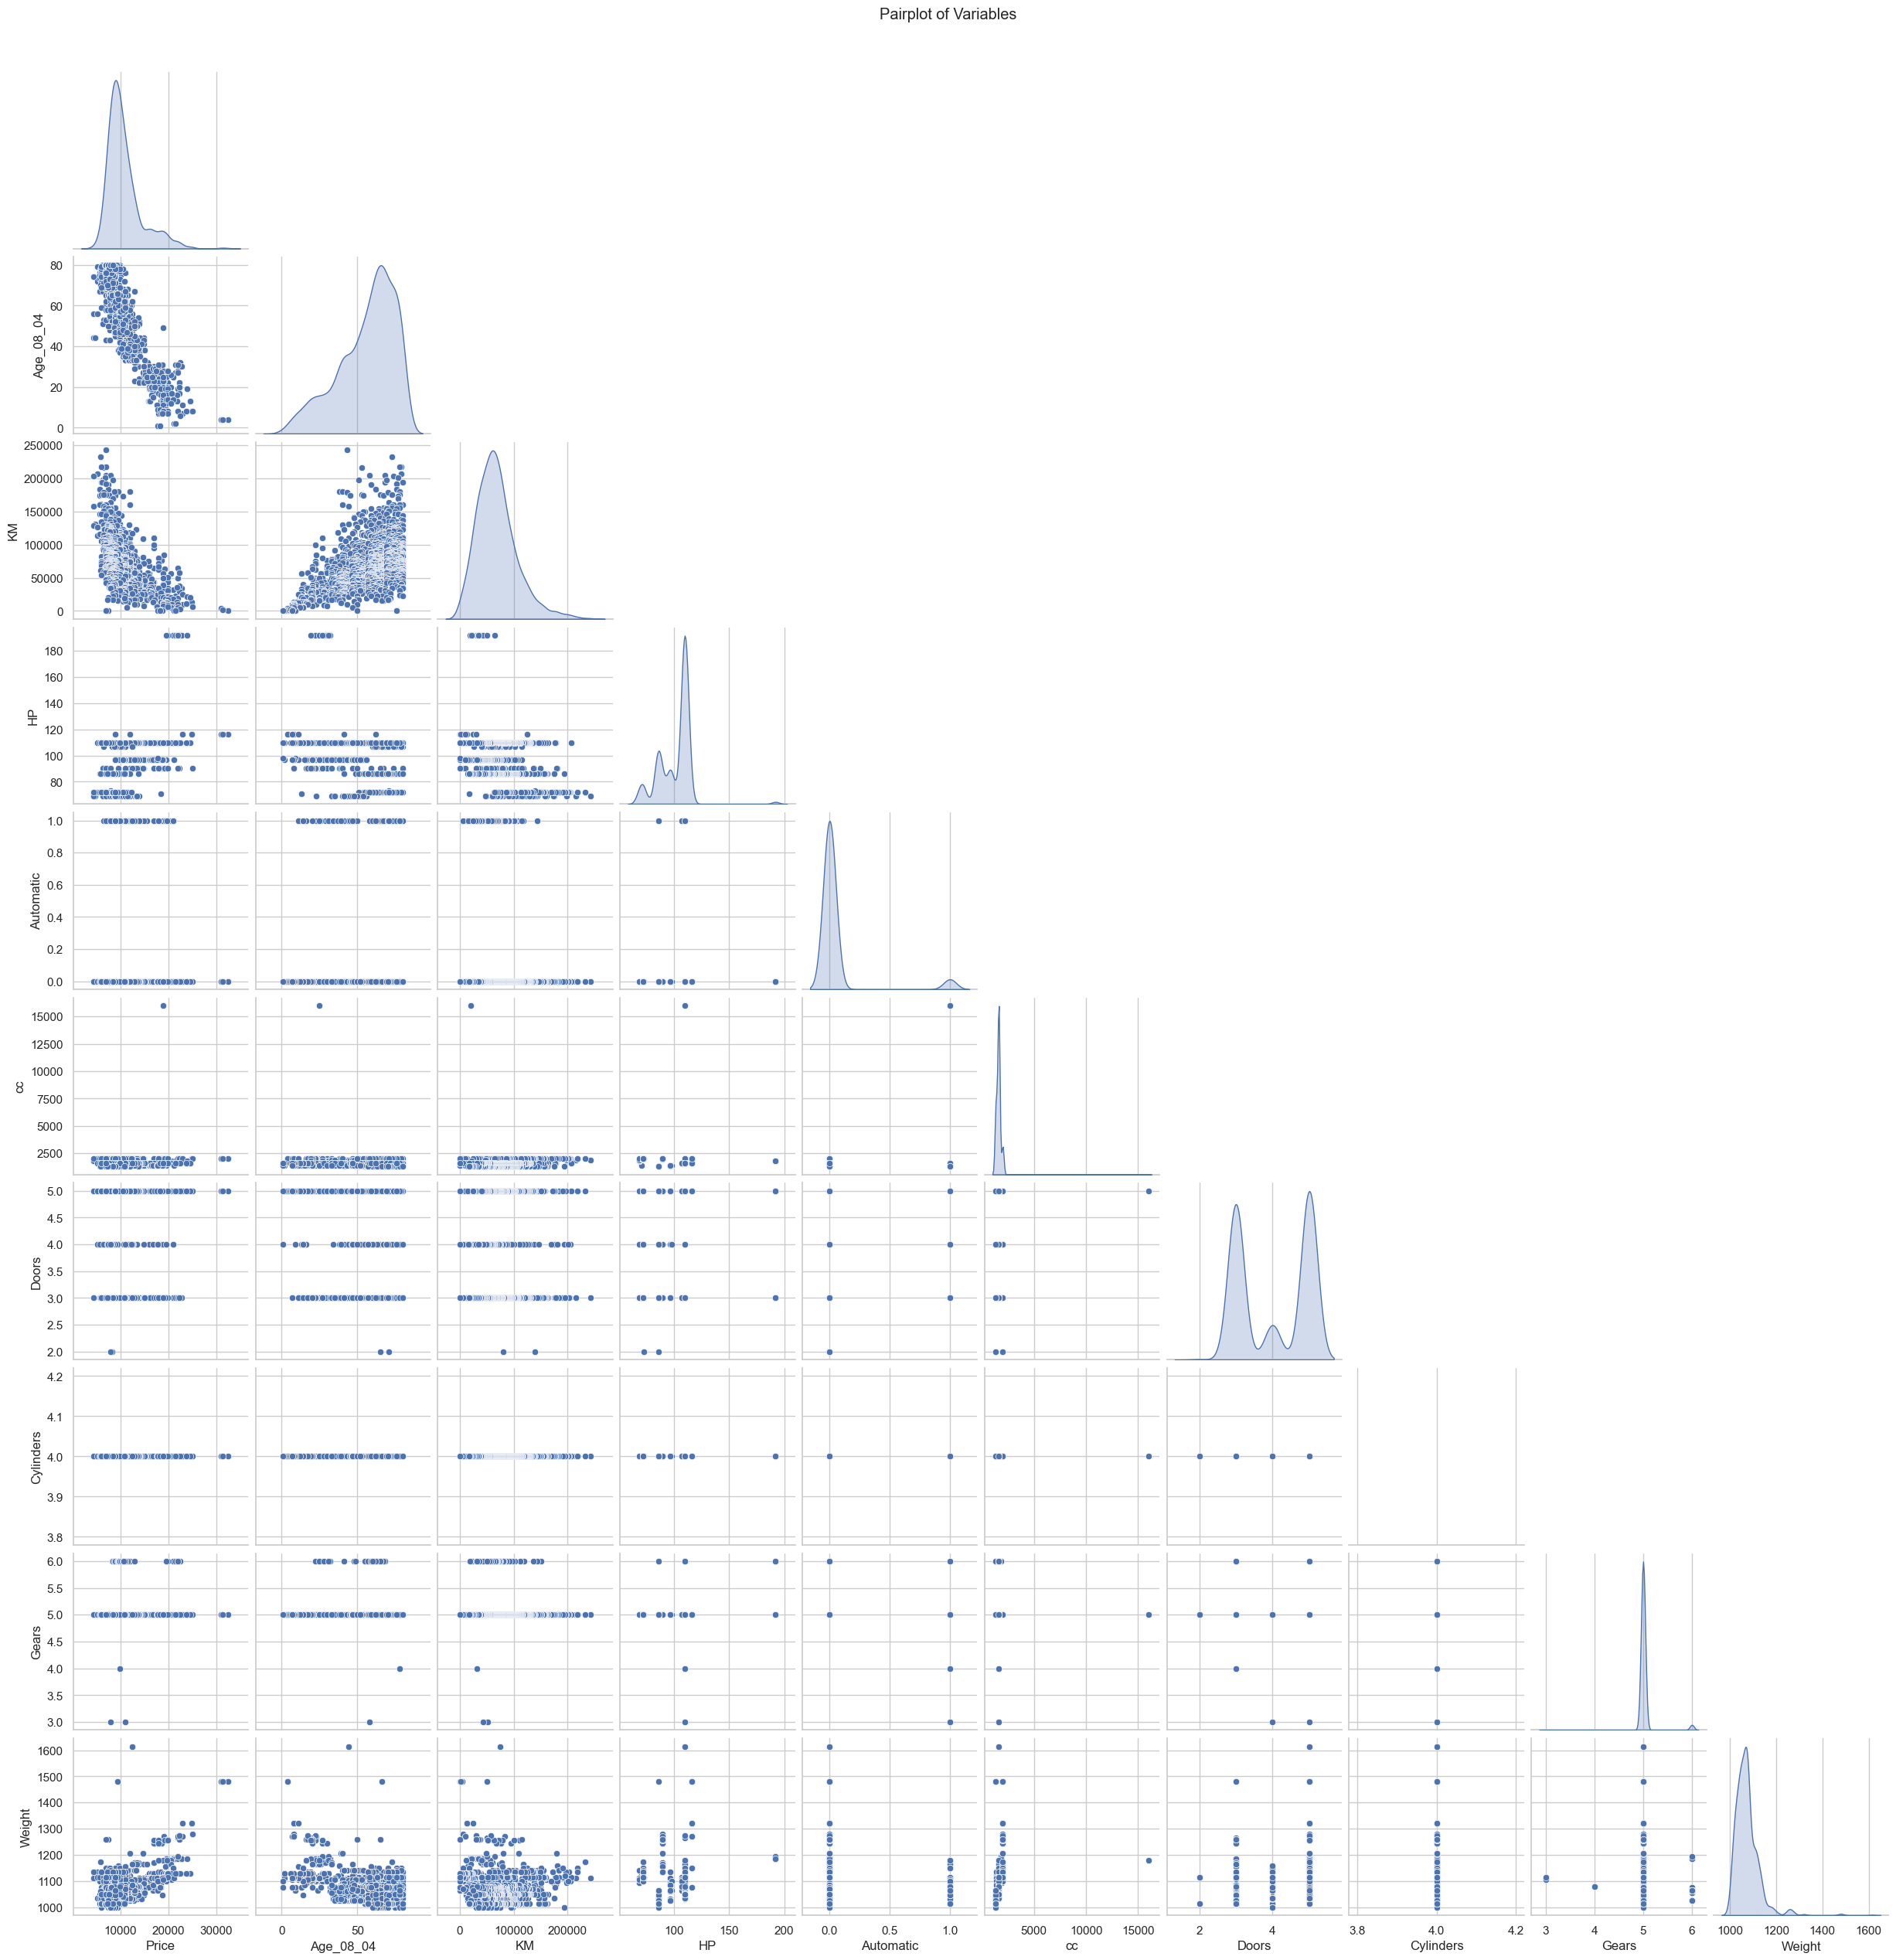

In [6]:
sns.set(style = 'whitegrid')
pairplot = sns.pairplot(df, diag_kind="kde", corner = True)
pairplot.fig.suptitle("Pairplot of Variables", y=1.02)

Text(0.5, 1.0, 'Correlation Heatmap of Variables')

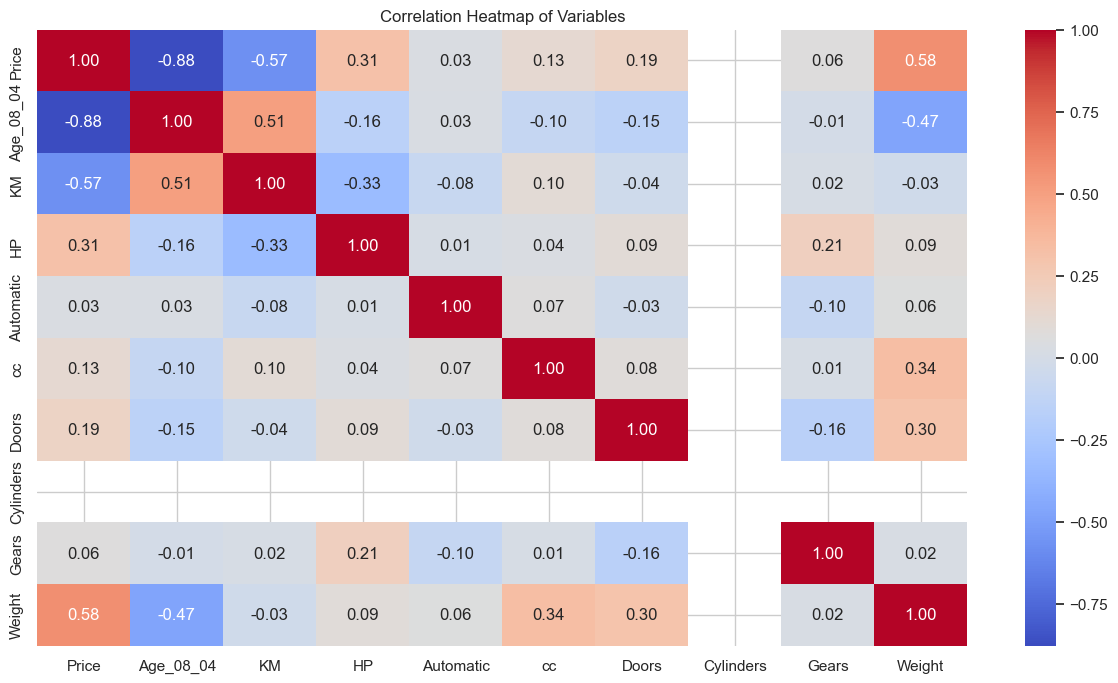

In [7]:
numeric_columns = df.select_dtypes(include = ['int64']).columns #'Fuel_Type' from the pairplot and heatmap since it's non-numeric

plt.figure(figsize = (15, 8))
correlation_matrix = df[numeric_columns].corr() # Correlation heatmap between numeric variables
heatmap = sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Heatmap of Variables")
     


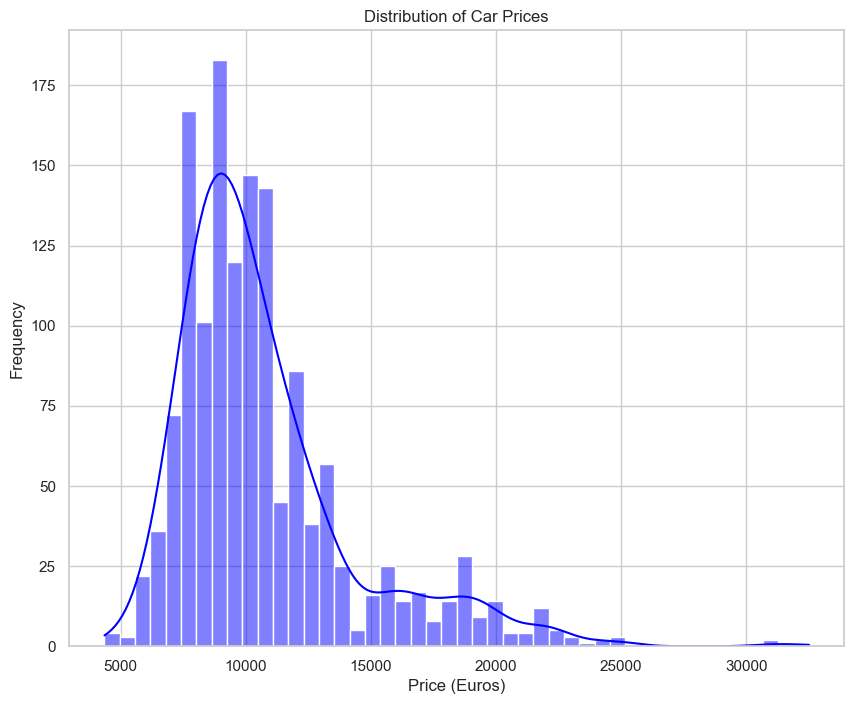

In [8]:
plt.figure(figsize = (10, 8)) # Visualizing distribution of Price
price_dist = sns.histplot(df['Price'], kde = True, color = 'blue')
plt.title("Distribution of Car Prices")
plt.xlabel("Price (Euros)")
plt.ylabel("Frequency")

plt.show()

In [9]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [10]:
data_encoded = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True) #Handle Categorical Data using one-hot encoding for the 'Fuel_Type' column

X = data_encoded.drop('Price', axis=1)
y = data_encoded['Price']
     

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
     

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
     

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# 2. split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, = train_test_split(X_scaled, y, test_size=0.2, random_state=42)  # X is feature matrix and y is target vector.

X_train.shape, X_test.shape, y_train.shape, y_test.shape  # Show the shapes of the resulting datasets to confirm the preprocessing
     


((1148, 11), (288, 11), (1148,), (288,))

# 3.Build a multiple linear regression model using the training dataset.

In [12]:
X_train_df = pd.DataFrame(X_train, columns=X.columns).reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)

model_1 = LinearRegression()
model_1.fit(X_train_df, y_train_reset)
coefficients_1 = model_1.coef_

model_2 = LinearRegression()
model_2.fit(X_train_df, y_train_reset)
coefficients_2 = model_2.coef_

model_3 = LinearRegression()
model_3.fit(X_train_df, y_train_reset)
coefficients_3 = model_3.coef_

# Using statsmodels for detailed summary
X_train_sm = sm.add_constant(X_train_df)  # Adds a constant term to the predictor
sm_model_1 = sm.OLS(y_train_reset, X_train_sm).fit()    #OLS - Ordinary Least Squares.
sm_model_2 = sm.OLS(y_train_reset, X_train_sm).fit()
sm_model_3 = sm.OLS(y_train_reset, X_train_sm).fit()

print(sm_model_1.summary())
print(sm_model_2.summary())
print(sm_model_3.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     762.7
Date:                Mon, 16 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:33:30   Log-Likelihood:                -9863.2
No. Observations:                1148   AIC:                         1.975e+04
Df Residuals:                    1137   BIC:                         1.980e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.075e+04     38.680  

In [13]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False) # Adding interaction terms or polynomial features
X_train_poly = poly.fit_transform(X_train_df[['Age_08_04', 'HP']])

model_3 = LinearRegression()
model_3.fit(X_train_poly, y_train_reset)

X_train_sm_3 = sm.add_constant(X_train_poly)
sm_model_3 = sm.OLS(y_train_reset, X_train_sm_3).fit()
print(sm_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     1627.
Date:                Mon, 16 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:33:30   Log-Likelihood:                -10082.
No. Observations:                1148   AIC:                         2.017e+04
Df Residuals:                    1144   BIC:                         2.019e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.069e+04     47.161    226.684      0.0

# 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [14]:
y_pred_1 = model_1.predict(X_test)

r2_1 = r2_score(y_test, y_pred_1)
mae_1 = mean_absolute_error(y_test, y_pred_1)
mse_1 = mean_squared_error(y_test, y_pred_1)
rmse_1 = np.sqrt(mse_1)

print(f"Model 1 Performance:")
print(f"R-squared: {r2_1:.4f}")
print(f"Mean Absolute Error : {mae_1:.2f}")
print(f"Mean Squared Error : {mse_1:.2f}")
print(f"Root Mean Squared Error : {rmse_1:.2f}")

     

Model 1 Performance:
R-squared: 0.8349
Mean Absolute Error : 990.89
Mean Squared Error : 2203043.82
Root Mean Squared Error : 1484.27


In [15]:
y_pred = model_2.predict(X_test)

In [16]:
y_pred_2 = model_2.predict(X_test)
r2_2 = r2_score(y_test, y_pred_2)
mae_2 = mean_absolute_error(y_test, y_pred_2)
mse_2 = mean_squared_error(y_test, y_pred_2)
rmse_2 = np.sqrt(mse_2)

print(f"\nModel 2 Performance:")
print(f"R-squared: {r2_2:.4f}")
print(f"Mean Absolute Error (MAE): {mae_2:.2f}")
print(f"Mean Squared Error (MSE): {mse_2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_2:.2f}")


Model 2 Performance:
R-squared: 0.8349
Mean Absolute Error (MAE): 990.89
Mean Squared Error (MSE): 2203043.82
Root Mean Squared Error (RMSE): 1484.27


In [17]:
y_pred = model_3.predict(x_test_model_3)

NameError: name 'x_test_model_3' is not defined

In [ ]:
y_pred_3 = model_3.predict(X_test_model_3)
r2_3 = r2_score(y_test, y_pred_3)
mae_3 = mean_absolute_error(y_test, y_pred_3)
mse_3 = mean_squared_error(y_test, y_pred_3)
rmse_3 = np.sqrt(mse_3)

print(f"\nModel 3 Performance:")
print(f"R-squared: {r2_3:.4f}")
print(f"Mean Absolute Error (MAE): {mae_3:.2f}")
print(f"Mean Squared Error (MSE): {mse_3:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_3:.2f}")
     

# 5.Apply Lasso and Ridge methods on the model.


In [ ]:
from sklearn.linear_model import Lasso  #Least Absolute Shrinkage and Selection Operator
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lasso = Lasso(alpha=0.1)    # Lasso regression with a alpha
lasso.fit(X_train_df, y_train_reset)

y_pred_lasso = lasso.predict(X_test) #Predict using Lasso.

r2_lasso = r2_score(y_test, y_pred_lasso)   # Apply Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

print("Lasso Regression Performance:")
print(f"R-squared: {r2_lasso:.4f}")
print(f"Mean Squared Error:{mse_lasso:.2f}")
print(f"Root Mean Squared Error: {rmse_lasso:.2f}")
print(f"Lasso Coefficients: {lasso.coef_}")
     

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)  # Ridge regression with alpha
ridge.fit(X_train_df, y_train_reset)

y_pred_ridge = ridge.predict(X_test)   # Predict using Ridge

r2_ridge = r2_score(y_test, y_pred_ridge)   # Apply Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("\nRidge Regression Performance:")
print(f"R-squared: {r2_ridge:.4f}")
print(f"Mean Squared Error : {mse_ridge:.2f}")
print(f"Root Mean Squared Error : {rmse_ridge:.2f}")
print(f"Ridge Coefficients: {ridge.coef_}")

# Interview Questions :
###### 1.What is Normalization & Standardization and how is it helpful?

Normalization and standardization are two techniques used in data preprocessing to scale numerical data, making it more suitable for machine learning models. Both techniques adjust the range and distribution of data, but they do so in different ways.

#### Normalization

Def: Normalization, also known as min-max scaling, transforms the data to fit within a specific range, typically [0, 1]. It adjusts the values by subtracting the minimum value of the feature and then dividing by the range (the difference between the maximum and minimum value).

Formula: Normalized value=(x−min⁡(X))/(max⁡(X)−min⁡(X))​

Use:

Normalization is particularly useful when you know that the distribution of data does not follow a Gaussian (Normal) distribution or when you want to scale features to be between a specific range, especially for algorithms like k-nearest neighbors or neural networks, where distances between points are important.

#### Standardization

Def: Standardization, also known as z-score normalization, transforms the data to have a mean of 0 and a standard deviation of 1. This technique centers the data by subtracting the mean of the feature and scales it by dividing by the standard deviation.

Formula: Standardized value=(x−μ)/σ​

Use:

Standardization is useful when the features have different units or scales but you want them to be comparable. It is often preferred when the data follows a Gaussian distribution. Algorithms like linear regression, logistic regression, and support vector machines often perform better with standardized data.

###### How are They Helpful?

#### Improving Model Performance:

Gradient Descent Convergence: For optimization algorithms like gradient descent, normalized or standardized data can help the algorithm converge faster by providing a more consistent scale for the coefficients.

Reducing Bias: Models that are sensitive to the scale of input data (like SVM, KNN, and neural networks) can be biased toward larger scale features. Normalization or standardization ensures that all features contribute equally to the model.

##### Preventing Overfitting:

Regularization: Techniques like Lasso and Ridge regression apply penalties based on the magnitude of coefficients.

Normalization and Standardization are crucial preprocessing steps that can significantly impact the performance and reliability of machine learning models.

###### 2.What techniques can be used to address multicollinearity in multiple linear regression?

Multicollinearity occurs in multiple linear regression when two or more independent variables are highly correlated with each other. This situation can cause issues because it makes it difficult to determine the individual effect of each predictor on the dependent variable.

Here are several techniques to address multicollinearity:

###### Remove Highly Correlated Predictors

Correlation Matrix: Calculate the correlation matrix of the independent variables and identify pairs with high correlations (e.g., > 0.8 or < -0.8). You can then remove one of the highly correlated variables.

Variance Inflation Factor (VIF): Calculate the VIF for each predictor. VIF measures how much the variance of a regression coefficient is inflated due to multicollinearity. A VIF value greater than 5 or 10 is often considered problematic, and you may consider removing the variable with a high VIF.

##### Combine Predictors

Principal Component Analysis (PCA): PCA reduces the dimensionality of the data by combining correlated variables into a smaller number of uncorrelated components. You can then use these components as predictors in the regression model.

Factor Analysis: Similar to PCA, factor analysis identifies underlying factors that explain the pattern of correlations within a set of observed variables. These factors can then be used as predictors.

###### Regularization Techniques

Lasso Regression: Lasso regression adds an L1 penalty, which can shrink some coefficients to zero, effectively performing variable selection and reducing multicollinearity.

Ridge Regression: Ridge regression adds an L2 penalty to the loss function, which shrinks the coefficients of correlated predictors towards zero but does not eliminate them. This reduces the impact of multicollinearity while keeping all predictors in the model.

Elastic Net: Elastic Net combines both L1 and L2 penalties and can be particularly effective when there are multiple correlated predictors.

###### Centered Variables

Mean Centering: Subtract the mean of each predictor from the values of that predictor. This can help reduce multicollinearity in models that include interaction terms or polynomial features, although it may not fully eliminate it.

The choice of technique depends on the specific dataset and the goals of the analysis. In many cases, a combination of these methods might be the most effective way to address multicollinearity.